# Praktikum 1

Anda sudah mengerti algoritma pemrosesan metode Bolzano dan juga sudah memahami cara kerjanya. Sekarang, Anda tinggal mengimplementasikan algoritma tersebut menjadi sebuah pro- gram komputer dengan metode Bolzano (yang dapat menampilkan proses iteratif numerik, lengkap dengan grafik fungsinya).

Iter          a         b         c        f(c)
0       1.00000   2.00000   1.50000    -0.12500
1       1.50000   2.00000   1.75000     1.60938
2       1.50000   1.75000   1.62500     0.66602
3       1.50000   1.62500   1.56250     0.25220
4       1.50000   1.56250   1.53125     0.05911
5       1.50000   1.53125   1.51562    -0.03405
6       1.51562   1.53125   1.52344     0.01225
7       1.51562   1.52344   1.51953    -0.01097
8       1.51953   1.52344   1.52148     0.00062
9       1.51953   1.52148   1.52051    -0.00518
10      1.52051   1.52148   1.52100    -0.00228
11      1.52100   1.52148   1.52124    -0.00083
12      1.52124   1.52148   1.52136    -0.00010
13      1.52136   1.52148   1.52142     0.00026
14      1.52136   1.52142   1.52139     0.00008
15      1.52136   1.52139   1.52138    -0.00001

Perkiraan akar ditemukan di x = 1.521378


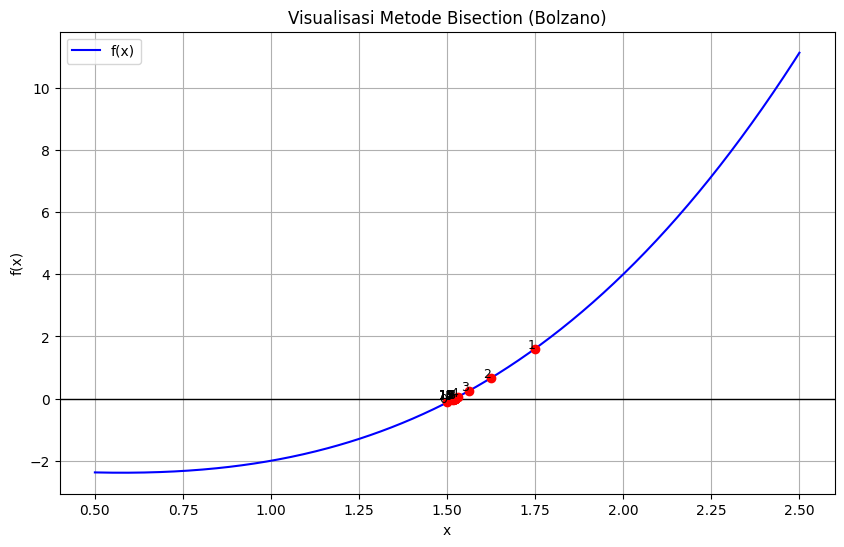

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi yang dicari akarnya
def f(x):
    return x**3 - x - 2

# Metode Bisection
def bisection(a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        print("Syarat Bolzano tidak terpenuhi: f(a) * f(b) ≥ 0")
        return None

    iterasi = 0
    data_iterasi = []

    print(f"{'Iter':<5}{'a':>10}{'b':>10}{'c':>10}{'f(c)':>12}")
    while (b - a) / 2.0 > tol and iterasi < max_iter:
        c = (a + b) / 2.0
        fc = f(c)
        data_iterasi.append((a, b, c, fc))
        print(f"{iterasi:<5}{a:>10.5f}{b:>10.5f}{c:>10.5f}{fc:>12.5f}")

        if abs(fc) < tol:
            break
        elif f(a) * fc < 0:
            b = c
        else:
            a = c
        iterasi += 1

    return c, data_iterasi

# Plot fungsi & iterasi akar
def plot_function_and_iterations(a, b, data_iterasi):
    x = np.linspace(a - 0.5, b + 0.5, 400)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=1)

    # Plot titik c dari tiap iterasi
    for i, (a_i, b_i, c_i, fc_i) in enumerate(data_iterasi):
        plt.plot(c_i, fc_i, 'ro')
        plt.text(c_i, fc_i, f'{i}', fontsize=9, ha='right')

    plt.title("Visualisasi Metode Bisection (Bolzano)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main program (Hardcode input)
if __name__ == "__main__":
    # Hardcoded input
    a = 1            # batas bawah
    b = 2            # batas atas
    tol = 1e-5       # toleransi
    max_iter = 100   # maksimum iterasi

    # Eksekusi metode bisection
    akar, data_iterasi = bisection(a, b, tol, max_iter)

    if akar is not None:
        print(f"\nPerkiraan akar ditemukan di x = {akar:.6f}")
        plot_function_and_iterations(a, b, data_iterasi)


# Praktikum 2

Salah satu kelemahan metode Trapezoidal adalah kita harus menggunakan jumlah interval yang besar untuk memperoleh akurasi yang diharapkan. Buatlah sebuah program komputer untuk menjelaskan bagaimana metode Integrasi Romberg dapat mengatasi kelemahan tersebut.

In [4]:
import numpy as np

# Contoh fungsi yang ingin diintegrasikan
def f(x):
    return np.sin(x)  # ∫ sin(x) dari 0 ke π hasilnya adalah 2.0

# Metode Trapezoidal biasa
def trapezoidal(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

# Metode Romberg
def romberg(f, a, b, max_level):
    R = np.zeros((max_level, max_level))

    # Kolom pertama: metode trapezoidal biasa
    for k in range(max_level):
        n = 2**k
        R[k, 0] = trapezoidal(f, a, b, n)

    # Richardson extrapolation
    for j in range(1, max_level):
        for i in range(j, max_level):
            R[i, j] = (4**j * R[i, j-1] - R[i-1, j-1]) / (4**j - 1)

    return R

# --- Contoh Kasus Hardcoded ---
a = 0
b = np.pi
max_level = 5  # Menghasilkan tabel 5x5

R = romberg(f, a, b, max_level)

# Output tabel Romberg
print("Tabel Romberg untuk ∫ sin(x) dx dari 0 ke π:")
for i in range(max_level):
    for j in range(i + 1):
        print(f"{R[i, j]:.10f}", end="\t")
    print()

# Bandingkan dengan hasil eksak
print(f"\nHasil eksak     : 2.0000000000")
print(f"Hasil terbaik   : {R[max_level - 1, max_level - 1]:.10f}")
print(f"Selisih galat   : {abs(R[max_level - 1, max_level - 1] - 2):.10e}")


Tabel Romberg untuk ∫ sin(x) dx dari 0 ke π:
0.0000000000	
1.5707963268	2.0943951024	
1.8961188979	2.0045597550	1.9985707318	
1.9742316019	2.0002691699	1.9999831309	2.0000055500	
1.9935703438	2.0000165910	1.9999997525	2.0000000163	1.9999999946	

Hasil eksak     : 2.0000000000
Hasil terbaik   : 1.9999999946
Selisih galat   : 5.4127093918e-09
